# Congresso Brasileiro de Automática

# UMA PLATAFORMA PARA INTERNET DOS VEÍCULOS INTELIGENTES


## Marianne Batista Diniz da Silva - mariannedinizsi@gmail.com
### Universidade Federal do Rio Grande do Norte, Natal, RN, Brasil

# Importando o Json e transformando em DataSet

In [ ]:
# Load Data
#import urllib.request
#urllib.request.urlretrieve('http://saiot.ect.ufrn.br:8000/static/logs.json', '../data/logs.json')

In [1]:
# Carregar os módulos necessários para análise
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import json
import datetime
from locale import atof

In [2]:
df_raw_data = pd.read_json('logs.json')
df_devices = pd.read_json('devices.json')

In [3]:
# Filtrando as colunas
df_raw_data = df_raw_data[['codSlot', 'dateTime', 'value']]
df_raw_data.dateTime = df_raw_data.dateTime.map(lambda d : d['$date'])
df_raw_data.dateTime = pd.to_datetime(df_raw_data.dateTime, format='%Y-%m-%d %H:%M:%S')

In [4]:
# Merge dos dados 
df_data = pd.merge(df_raw_data, df_devices, on='codSlot', how='outer')
df_data = df_data[['dateTime', 'serial', 'tag', 'value']]

In [5]:
# Limpando o DataSet
df_data.dropna(axis=0, inplace=True)
df_data.reset_index(drop=True, inplace=True)

In [6]:
def split_data_frame_dict(df, target_column):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def split_list_to_rows(row, row_accumulator, target_column):
        import json

        split_row = json.loads(row[target_column])
        for k, v in split_row.items():
            new_row = row.to_dict()
            new_row['tag'] = k.upper()
            new_row[target_column] = v
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(split_list_to_rows, axis=1, args=(new_rows, target_column))
    new_df = pd.DataFrame(new_rows)

    return new_df

In [7]:
# Gerando o csv
cars = [df_data[df_data.serial == car] for car in df_data.serial.unique()]

In [8]:
cars_cols = [
    [
        car[car.tag == col][['dateTime', 'value']].rename(columns={
            'value': col, 'dateTime': 'TIMESTAMP'
        }) for col in list(car.tag.unique())
    ] for car in cars
]

In [9]:
from functools import reduce

df_merged = [reduce(lambda left, right: pd.merge(left, right, how='outer', on='TIMESTAMP'), col) for col in cars_cols]

In [10]:
car_names = [car.iloc[0].serial for car in cars]

In [11]:
for i, df in enumerate(df_merged):
    df.to_csv(car_names[i] + '.csv', index=False)

# Análises dos Sensores Veiculares

In [13]:
# Importando os dados
df_vehicle = pd.read_csv(
    "carro06.csv")

In [14]:
# Visualizando as 5 primeiras linhas da base de dados
df_vehicle.head()

,TIMESTAMP,THROTTLE_POS,LATITUDE,LONGITUDE,ALTITUDE,PENDING_TROUBLE_CODES,TROUBLE_CODES,AIR_INTAKE_TEMP,ENGINE_RPM,VIN,...,TIMING_ADVANCE,ENGINE_COOLANT_TEMP,AMBIENT_AIR_TEMP,ENGINE_RUNTIME,ENGINE_LOAD,FUEL_LEVEL,CONTROL_MODULE_VOLTAGE,SHORT_TERM_BANK_1,BAROMETRIC_PRESSURE,REL_THROTTLE_POS
0,2018-03-27 20:19:09.583,14.509804,-5.832046,-35.205605,33.399575,[C0700],[C0300],57.0,896.0,1A1JC5444R7252367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-27 20:19:10.397,14.509804,-5.832046,-35.205605,33.400513,[C0700],[C0300],57.0,886.0,1A1JC5444R7252367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-27 20:19:11.336,14.509804,-5.832050,-35.205602,33.406179,[C0700],[C0300],57.0,877.0,1A1JC5444R7252367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-27 20:19:12.909,14.509804,-5.832053,-35.205600,0.000000,[C0700],[C0300],57.0,901.0,1A1JC5444R7252367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-03-27 20:19:13.420,14.509804,-5.832050,-35.205602,33.425396,[C0700],[C0300],57.0,883.0,1A1JC5444R7252367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 28 columns):
TIMESTAMP                                4645 non-null object
THROTTLE_POS                             4627 non-null float64
LATITUDE                                 4645 non-null float64
LONGITUDE                                4645 non-null float64
ALTITUDE                                 4645 non-null float64
PENDING_TROUBLE_CODES                    1008 non-null object
TROUBLE_CODES                            1008 non-null object
AIR_INTAKE_TEMP                          4627 non-null float64
ENGINE_RPM                               4603 non-null float64
VIN                                      4645 non-null object
SPEED                                    4362 non-null float64
PIDS_01_20                               2 non-null object
PIDS_41_60                               2 non-null object
PIDS_21_40                               2 non-null object
EQUIV_RATIO                

In [16]:
# Criando um dicionário com todos os comandos suportados pelo Veículo (PID and Name)
mode1 = {
    0x01: 'Monitor status since DTCs cleared.',
    0x02: 'Freeze DTC',
    0x03: 'Fuel system status',
    0x04: 'Calculated engine load',
    0x05: 'Engine coolant temperature',
    0x06: 'Short term fuel trim—Bank 1',
    0x07: 'Long term fuel trim—Bank 1',
    0x08: 'Short term fuel trim—Bank 2',
    0x09: 'Long term fuel trim—Bank 2',
    0x0A: 'Fuel pressure (gauge pressure)',
    0x0B: 'Intake manifold absolute pressure',
    0x0C: 'Engine RPM',
    0x0D: 'Vehicle speed',
    0x0E: 'Timing advance',
    0x0F: 'Intake air temperature',
    0x10: 'MAF air flow rate',
    0x11: 'Throttle position',
    0x12: 'Commanded secondary air status',
    0x13: 'Oxygen sensors present (in 2 banks)',
    0x14: 'Oxygen Sensor 1',
    0x15: 'Oxygen Sensor 2',
    0x16: 'Oxygen Sensor 3',
    0x17: 'Oxygen Sensor 4',
    0x18: 'Oxygen Sensor 5',
    0x19: 'Oxygen Sensor 6',
    0x1A: 'Oxygen Sensor 7',
    0x1B: 'Oxygen Sensor 8',
    0x1C: 'OBD standards this vehicle conforms to',
    0x1D: 'Oxygen sensors present (in 4 banks)',
    0x1E: 'Auxiliary input status',
    0x1F: 'Run time since engine start',
    0x20: 'PIDs supported [21 - 40]',
    0x21: 'Distance traveled with malfunction indicator lamp (MIL) on',
    0x22: 'Fuel Rail Pressure (relative to manifold vacuum)',
    0x23: 'Fuel Rail Gauge Pressure (diesel, or gasoline direct injection)',
    0x24: 'Oxygen Sensor 1',
    0x25: 'Oxygen Sensor 2',
    0x26: 'Oxygen Sensor 3',
    0x27: 'Oxygen Sensor 4',
    0x28: 'Oxygen Sensor 5',
    0x29: 'Oxygen Sensor 6',
    0x2A: 'Oxygen Sensor 7',
    0x2B: 'Oxygen Sensor 8',
    0x2C: 'Commanded EGR',
    0x2D: 'EGR Error',
    0x2E: 'Commanded evaporative purge',
    0x2F: 'Fuel Tank Level Input',
    0x30: 'Warm-ups since codes cleared',
    0x31: 'Distance traveled since codes cleared',
    0x32: 'Evap. System Vapor Pressure',
    0x33: 'Absolute Barometric Pressure',
    0x34: 'Oxygen Sensor 1',
    0x35: 'Oxygen Sensor 2',
    0x36: 'Oxygen Sensor 3',
    0x37: 'Oxygen Sensor 4',
    0x38: 'Oxygen Sensor 5',
    0x39: 'Oxygen Sensor 6',
    0x3A: 'Oxygen Sensor 7',
    0x3B: 'Oxygen Sensor 8',
    0x3C: 'Catalyst Temperature: Bank 1, Sensor 1',
    0x3D: 'Catalyst Temperature: Bank 2, Sensor 1',
    0x3E: 'Catalyst Temperature: Bank 1, Sensor 2',
    0x3F: 'Catalyst Temperature: Bank 2, Sensor 2',
    0x40: 'PIDs supported [41 - 60]',
    0x41: 'Monitor status this drive cycle',
    0x42: 'Control module voltage',
    0x43: 'Absolute load value',
    0x44: 'Fuel–Air commanded equivalence ratio',
    0x45: 'Relative throttle position',
    0x46: 'Ambient air temperature',
    0x47: 'Absolute throttle position B',
    0x48: 'Absolute throttle position C',
    0x49: 'Accelerator pedal position D',
    0x4A: 'Accelerator pedal position E',
    0x4B: 'Accelerator pedal position F',
    0x4C: 'Commanded throttle actuator',
    0x4D: 'Time run with MIL on',
    0x4E: 'Time since trouble codes cleared',
    0x4F: 'Maximum value for Fuel–Air equivalence ratio, oxygen sensor voltage, oxygen sensor current, and intake manifold absolute pressure',
    0x50: 'Maximum value for air flow rate from mass air flow sensor',
    0x51: 'Fuel Type',
    0x52: 'Ethanol fuel',
    0x53: 'Absolute Evap system Vapor Pressure',
    0x54: 'Evap system vapor pressure',
    0x55: 'Short term secondary oxygen sensor trim, A: bank 1, B: bank 3',
    0x56: 'Long term secondary oxygen sensor trim, A: bank 1, B: bank 3',
    0x57: 'Short term secondary oxygen sensor trim, A: bank 2, B: bank 4',
    0x58: 'Long term secondary oxygen sensor trim, A: bank 2, B: bank 4',
    0x59: 'Fuel rail absolute pressure',
    0x5A: 'Relative accelerator pedal position',
    0x5B: 'Hybrid battery pack remaining life',
    0x5C: 'Engine oil temperature',
    0x5D: 'Fuel injection timing',
    0x5E: 'Engine fuel rate',
    0x5F: 'Emission requirements to which vehicle is designed',
    0x60: 'PIDs supported [61 - 80]',
    0x61: 'Driver\'s demand engine - percent torque',
    0x62: 'Actual engine - percent torque',
    0x63: 'Engine reference torque',
    0x64: 'Engine percent torque data',
    0x65: 'Auxiliary input / output supported',
    0x66: 'Mass air flow sensor',
    0x67: 'Engine coolant temperature',
    0x68: 'Intake air temperature sensor',
    0x69: 'Commanded EGR and EGR Error',
    0x6A: 'Commanded Diesel intake air flow control and relative intake air flow position',
    0x6B: 'Exhaust gas recirculation temperature',
    0x6C: 'Commanded throttle actuator control and relative throttle position',
    0x6D: 'Fuel pressure control system',
    0x6E: 'Injection pressure control system',
    0x6F: 'Turbocharger compressor inlet pressure',
    0x70: 'Boost pressure control',
    0x71: 'Variable Geometry turbo (VGT) control',
    0x72: 'Wastegate control',
    0x73: 'Exhaust pressure',
    0x74: 'Turbocharger RPM',
    0x75: 'Turbocharger temperature',
    0x76: 'Turbocharger temperature',
    0x77: 'Charge air cooler temperature (CACT)',
    0x78: 'Exhaust Gas temperature (EGT) Bank 1',
    0x79: 'Exhaust Gas temperature (EGT) Bank 2',
    0x7A: 'Diesel particulate filter (DPF)',
    0x7B: 'Diesel particulate filter (DPF)',
    0x7C: 'Diesel Particulate filter (DPF) temperature',
    0x7D: 'NOx NTE (Not-To-Exceed) control area status',
    0x7E: 'PM NTE (Not-To-Exceed) control area status',
    0x7F: 'Engine run time',
    0x80: 'PIDs supported [81 - A0]',
    0x81: 'Engine run time for Auxiliary Emissions Control Device(AECD)',
    0x82: 'Engine run time for Auxiliary Emissions Control Device(AECD)',
    0x83: 'NOx sensor',
    0x84: 'Manifold surface temperature',
    0x85: 'NOx reagent system',
    0x86: 'Particulate matter (PM) sensor',
    0x87: 'Intake manifold absolute pressure',
    0xA0: 'PIDs supported [A1 - C0]',
    0xC0: 'PIDs supported [C1 - E0]'
}

mode5 = {
    0x0101: 'O2 Sensor Monitor Bank 1 Sensor 1',
    0x0102: 'O2 Sensor Monitor Bank 1 Sensor 2',
    0x0103: 'O2 Sensor Monitor Bank 1 Sensor 3',
    0x0104: 'O2 Sensor Monitor Bank 1 Sensor 4',
    0x0105: 'O2 Sensor Monitor Bank 2 Sensor 1',
    0x0106: 'O2 Sensor Monitor Bank 2 Sensor 2',
    0x0107: 'O2 Sensor Monitor Bank 2 Sensor 3',
    0x0108: 'O2 Sensor Monitor Bank 2 Sensor 4',
    0x0109: 'O2 Sensor Monitor Bank 3 Sensor 1',
    0x010A: 'O2 Sensor Monitor Bank 3 Sensor 2',
    0x010B: 'O2 Sensor Monitor Bank 3 Sensor 3',
    0x010C: 'O2 Sensor Monitor Bank 3 Sensor 4',
    0x010D: 'O2 Sensor Monitor Bank 4 Sensor 1',
    0x010E: 'O2 Sensor Monitor Bank 4 Sensor 2',
    0x010F: 'O2 Sensor Monitor Bank 4 Sensor 3',
    0x0110: 'O2 Sensor Monitor Bank 4 Sensor 4',
    0x0201: 'O2 Sensor Monitor Bank 1 Sensor 1',
    0x0202: 'O2 Sensor Monitor Bank 1 Sensor 2',
    0x0203: 'O2 Sensor Monitor Bank 1 Sensor 3',
    0x0204: 'O2 Sensor Monitor Bank 1 Sensor 4',
    0x0205: 'O2 Sensor Monitor Bank 2 Sensor 1',
    0x0206: 'O2 Sensor Monitor Bank 2 Sensor 2',
    0x0207: 'O2 Sensor Monitor Bank 2 Sensor 3',
    0x0208: 'O2 Sensor Monitor Bank 2 Sensor 4',
    0x0209: 'O2 Sensor Monitor Bank 3 Sensor 1',
    0x020A: 'O2 Sensor Monitor Bank 3 Sensor 2',
    0x020B: 'O2 Sensor Monitor Bank 3 Sensor 3',
    0x020C: 'O2 Sensor Monitor Bank 3 Sensor 4',
    0x020D: 'O2 Sensor Monitor Bank 4 Sensor 1',
    0x020E: 'O2 Sensor Monitor Bank 4 Sensor 2',
    0x020F: 'O2 Sensor Monitor Bank 4 Sensor 3',
    0x0210: 'O2 Sensor Monitor Bank 4 Sensor 4'
}

mode9 = {
    0x01: 'VIN Message Count in PID 02. Only for ISO 9141-2, ISO 14230-4 and SAE J1850.',
    0x02: 'Vehicle Identification Number (VIN)',
    0x03: 'Calibration ID message count for PID 04. Only for ISO 9141-2, ISO 14230-4 and SAE J1850.',
    0x04: 'Calibration ID',
    0x05: 'Calibration verification numbers (CVN) message count for PID 06. Only for ISO 9141-2, ISO 14230-4 and SAE J1850.',
    0x06: 'Calibration Verification Numbers (CVN) Several CVN can be outputed (4 bytes each) the number of CVN and CALID must match',
    0x07: 'In-use performance tracking message count for PID 08 and 0B. Only for ISO 9141-2, ISO 14230-4 and SAE J1850.',
    0x08: 'In-use performance tracking for spark ignition vehicles',
    0x09: 'ECU name message count for PID 0A',
    0x0A: 'ECU name',
    0x0B: 'In-use performance tracking for compression ignition vehicles'
}

In [17]:
# Verificando os PIDs suportados
pid_suportados = df_vehicle[[
    'PIDS_01_20',
    'PIDS_41_60',
    'PIDS_21_40'    
]].iloc[4627]
pid_suportados

PIDS_01_20    BE3EB813
PIDS_41_60    7ED20400
PIDS_21_40    8007A011
Name: 4627, dtype: object

In [18]:
# Dataset
cars = {
    'HB20': {
        'year': 2015,
        'cmds': [0xBE3EB813, 0x7ED20400, 0x8007A011],
        'mode5': [0x7F],
        'mode9': [0x54000000]
    }
}

In [19]:
# Função para analisar os sensores
from functools import reduce


def available_pids(number, start=0):
    return [p + start for p in range(1, 33) if (number>>(32-p)&1) == 1]

def get_available(binarized):
    arr = [available_pids(b, 0x20*i) for i, b in enumerate(binarized)]
    return reduce((lambda x, y: x + y), arr) if len(arr) > 0 else []

def fill_pids1(arr):
    return [(hex(i), mode1[i]) for i in arr]

def fill_pids5(arr):
    return [(hex(i), mode5[i]) for i in arr]

def fill_pids9(arr):
    return [(hex(i), mode9[i]) for i in arr]

def decode_car_cmds(car):
    d_car = car
    d_car['d_cmds'] = fill_pids1(get_available(car['cmds']))
    d_car['d_mode5'] = (get_available(car['mode5']))
    d_car['d_mode9'] = fill_pids9(get_available(car['mode9']))
    return d_car

In [20]:
for k, v in cars.items():
    cars[k] = decode_car_cmds(v)

In [21]:
cars

{'HB20': {'cmds': [3191781395, 2127692800, 2147983377],
  'd_cmds': [('0x1', 'Monitor status since DTCs cleared.'),
   ('0x3', 'Fuel system status'),
   ('0x4', 'Calculated engine load'),
   ('0x5', 'Engine coolant temperature'),
   ('0x6', 'Short term fuel trim—Bank 1'),
   ('0x7', 'Long term fuel trim—Bank 1'),
   ('0xb', 'Intake manifold absolute pressure'),
   ('0xc', 'Engine RPM'),
   ('0xd', 'Vehicle speed'),
   ('0xe', 'Timing advance'),
   ('0xf', 'Intake air temperature'),
   ('0x11', 'Throttle position'),
   ('0x13', 'Oxygen sensors present (in 2 banks)'),
   ('0x14', 'Oxygen Sensor 1'),
   ('0x15', 'Oxygen Sensor 2'),
   ('0x1c', 'OBD standards this vehicle conforms to'),
   ('0x1f', 'Run time since engine start'),
   ('0x20', 'PIDs supported [21 - 40]'),
   ('0x22', 'Fuel Rail Pressure (relative to manifold vacuum)'),
   ('0x23', 'Fuel Rail Gauge Pressure (diesel, or gasoline direct injection)'),
   ('0x24', 'Oxygen Sensor 1'),
   ('0x25', 'Oxygen Sensor 2'),
   ('0x26', 'O

In [22]:
s1  =  fill_pids1 (get_available([0xBE3EB813, 0x7ED20400, 0x8007A011]))
s2 = cars['HB20']['d_cmds']
len(s1), len(s2)

(37, 37)

# HeatMap

In [23]:
#Transformando a data
df_vehicle.TIMESTAMP = pd.to_datetime(df_vehicle.TIMESTAMP, format='%Y-%m-%d %H:%M:%S')

x_last_trip = df_vehicle.loc[(df_vehicle['TIMESTAMP'] > datetime.date(2018, 6, 25))]
x_last_trip.head()

,TIMESTAMP,THROTTLE_POS,LATITUDE,LONGITUDE,ALTITUDE,PENDING_TROUBLE_CODES,TROUBLE_CODES,AIR_INTAKE_TEMP,ENGINE_RPM,VIN,...,TIMING_ADVANCE,ENGINE_COOLANT_TEMP,AMBIENT_AIR_TEMP,ENGINE_RUNTIME,ENGINE_LOAD,FUEL_LEVEL,CONTROL_MODULE_VOLTAGE,SHORT_TERM_BANK_1,BAROMETRIC_PRESSURE,REL_THROTTLE_POS
1738,2018-06-25 15:23:07.144,15.686275,-7.071057,-34.841117,0.0,NaN,NaN,59.0,NaN,9BHBG51CAGP519267,...,NaN,81.0,27.0,NaN,NaN,66.666664,12.168,NaN,100.0,5.098039
1739,2018-06-25 15:23:09.291,15.686275,-7.071057,-34.841117,0.0,NaN,NaN,59.0,NaN,9BHBG51CAGP519267,...,NaN,81.0,27.0,NaN,NaN,66.666664,12.168,NaN,100.0,5.098039
1740,2018-06-25 15:23:11.253,15.686275,-7.071057,-34.841117,0.0,NaN,NaN,59.0,NaN,9BHBG51CAGP519267,...,NaN,81.0,27.0,NaN,NaN,66.274510,12.168,NaN,100.0,5.098039
1741,2018-06-25 15:23:13.849,13.725491,-7.071057,-34.841117,0.0,NaN,NaN,59.0,NaN,9BHBG51CAGP519267,...,-4.0,81.0,27.0,NaN,NaN,66.666664,12.168,NaN,100.0,3.529412
1742,2018-06-25 15:23:15.826,14.509804,-7.069954,-34.841422,0.0,NaN,NaN,59.0,1151.0,9BHBG51CAGP519267,...,21.5,81.0,27.0,2.0,20.392157,66.274510,13.395,NaN,100.0,5.490196


In [24]:
# Substituindo a string "null" na base de dados por NaN
x_last_trip.replace('null', np.NaN, inplace=True)
x_last_trip.head()

C:\Users\Marianne Diniz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TIMESTAMP,THROTTLE_POS,LATITUDE,LONGITUDE,ALTITUDE,PENDING_TROUBLE_CODES,TROUBLE_CODES,AIR_INTAKE_TEMP,ENGINE_RPM,VIN,...,TIMING_ADVANCE,ENGINE_COOLANT_TEMP,AMBIENT_AIR_TEMP,ENGINE_RUNTIME,ENGINE_LOAD,FUEL_LEVEL,CONTROL_MODULE_VOLTAGE,SHORT_TERM_BANK_1,BAROMETRIC_PRESSURE,REL_THROTTLE_POS
1738,2018-06-25 15:23:07.144,15.686275,-7.071057,-34.841117,0.0,NaN,NaN,59.0,NaN,9BHBG51CAGP519267,...,NaN,81.0,27.0,NaN,NaN,66.666664,12.168,NaN,100.0,5.098039
1739,2018-06-25 15:23:09.291,15.686275,-7.071057,-34.841117,0.0,NaN,NaN,59.0,NaN,9BHBG51CAGP519267,...,NaN,81.0,27.0,NaN,NaN,66.666664,12.168,NaN,100.0,5.098039
1740,2018-06-25 15:23:11.253,15.686275,-7.071057,-34.841117,0.0,NaN,NaN,59.0,NaN,9BHBG51CAGP519267,...,NaN,81.0,27.0,NaN,NaN,66.274510,12.168,NaN,100.0,5.098039
1741,2018-06-25 15:23:13.849,13.725491,-7.071057,-34.841117,0.0,NaN,NaN,59.0,NaN,9BHBG51CAGP519267,...,-4.0,81.0,27.0,NaN,NaN,66.666664,12.168,NaN,100.0,3.529412
1742,2018-06-25 15:23:15.826,14.509804,-7.069954,-34.841422,0.0,NaN,NaN,59.0,1151.0,9BHBG51CAGP519267,...,21.5,81.0,27.0,2.0,20.392157,66.274510,13.395,NaN,100.0,5.490196


In [25]:
# Limitando as colunas
x_last = x_last_trip[[
    'LATITUDE',
    'LONGITUDE',
    'SPEED'
]]

In [26]:
# Eliminar as linhas com algum valor nulo
x_last.dropna(axis=0, inplace=True)
x_last.reset_index(drop=True, inplace=True)

# Dataset higienizado
x_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 3 columns):
LATITUDE     2791 non-null float64
LONGITUDE    2791 non-null float64
SPEED        2791 non-null float64
dtypes: float64(3)
memory usage: 65.5 KB


C:\Users\Marianne Diniz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
import folium
from folium.plugins import HeatMap

# Criar uma lista com [[lat,log,propriedade]]
coordinates = [[x_last.iloc[i]['LATITUDE'], x_last.iloc[i]['LONGITUDE'], x_last.iloc[i]['SPEED']] for i in range(len(x_last))]

In [28]:
np_coordinates = np.array(coordinates)
[np.median(np_coordinates[:, 0]), np.median(np_coordinates[:, 1])]

[-7.1898752, -35.3379334]

In [29]:
#create map object
map_speed = folium.Map(
    location = [np.mean(np_coordinates[:, 0]), np.mean(np_coordinates[:, 1])],
    zoom_start= 13
)

# Valor máximo da propriedade com o intuito de normalizar os graficos
max_speed = x_last['SPEED'].max()
print(max_speed)

HeatMap(coordinates, max_val=max_speed).add_to(map_speed)
map_speed

145.0


# Controle de Voltagem da Bateria

In [30]:
# Limitando as colunas
x_last_trip = x_last_trip[[
    'CONTROL_MODULE_VOLTAGE'    
]]

In [31]:
#Selecionando os 50 primeiros
x_last = x_last_trip.iloc[3:50].reset_index(drop=True)
x_last

,CONTROL_MODULE_VOLTAGE
0,12.168
1,13.395
2,13.489
3,14.244
4,14.527
5,14.149
6,14.338
7,14.338
8,14.621
9,14.338


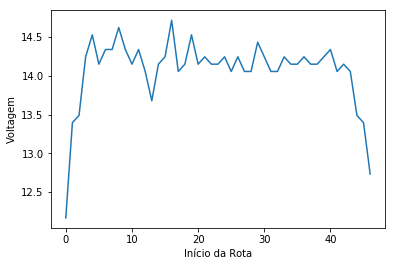

In [32]:
#plot do gráfico
plt.plot(x_last)
plt.ylabel('Voltagem')
plt.xlabel('Início da Rota')
plt.show()